In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# 1. Load the data and remove unnecessary columns
data = pd.read_csv("output.csv")
file_names = data["filename"]
data = data.drop(["filename", "veg_quantiles"], axis=1)
data.head()

,mean_veg_height,median_veg_height,vegetation_ratio (%),building_ratio (%),veg_variance
0,0.710136,0.000000,10.536459,89.463541,10.641622
1,6.731572,6.943317,65.492203,34.507797,21.709066
2,1.344723,0.000000,13.173628,86.826372,27.993210
3,0.581120,0.000000,8.153264,91.846736,13.144210
4,10.772953,11.212799,90.014112,9.985888,18.369394


In [3]:
data.head()

,mean_veg_height,median_veg_height,vegetation_ratio (%),building_ratio (%),veg_variance
0,0.710136,0.000000,10.536459,89.463541,10.641622
1,6.731572,6.943317,65.492203,34.507797,21.709066
2,1.344723,0.000000,13.173628,86.826372,27.993210
3,0.581120,0.000000,8.153264,91.846736,13.144210
4,10.772953,11.212799,90.014112,9.985888,18.369394


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean_veg_height       460 non-null    float64
 1   median_veg_height     460 non-null    float64
 2   vegetation_ratio (%)  460 non-null    float64
 3   building_ratio (%)    460 non-null    float64
 4   veg_variance          459 non-null    float64
dtypes: float64(5)
memory usage: 18.1 KB


In [5]:
# 2. Normalize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [6]:
# 3. Select the features
selected_features = ["mean_veg_height", "vegetation_ratio (%)"]
selected_data = data[selected_features]

In [7]:
# 4. Cluster analysis
kmeans = KMeans(n_clusters=3)
kmeans.fit(selected_data)
cluster_labels = kmeans.predict(selected_data)

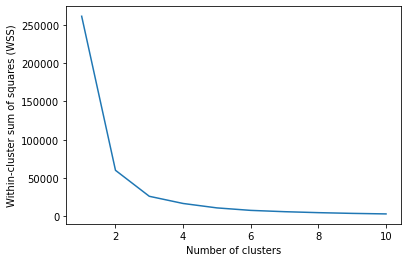

In [8]:
# 5. Cluster evaluation
# Use the elbow method to determine the optimal number of clusters
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(selected_data)
    wss.append(kmeans.inertia_)
plt.plot(range(1, 11), wss)
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster sum of squares (WSS)")
plt.show()

In [9]:
# Use the silhouette score to evaluate the quality of the clustering
from sklearn.metrics import silhouette_score
silhouette_score = silhouette_score(selected_data, cluster_labels)
print("Silhouette score: ", silhouette_score)

Silhouette score:  0.6571816294053284


In [10]:
# 6. Save cluster labels and file names to CSV files
for i in range(kmeans.n_clusters):
    file_indices = [j for j, label in enumerate(cluster_labels) if label == i]
    file_names_cluster = file_names[file_indices]
    file_names_cluster.to_csv(f"cluster_{i+1}.csv", index=False)

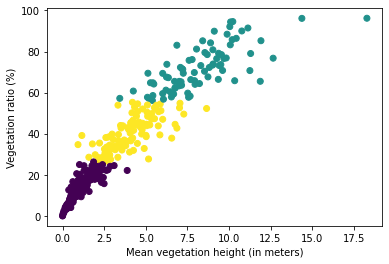

In [11]:
# 7. Visualization
plt.scatter(selected_data["mean_veg_height"], selected_data["vegetation_ratio (%)"], c=cluster_labels)
plt.xlabel("Mean vegetation height (in meters)")
plt.ylabel("Vegetation ratio (%)")
plt.show()

In [12]:
# 7. Interpretation
clustered_data = data.copy()
clustered_data["cluster_label"] = cluster_labels
clustered_data.groupby("cluster_label").mean()

,mean_veg_height,median_veg_height,vegetation_ratio (%),building_ratio (%),veg_variance
cluster_label,,,,,
0,1.029020,0.000000,12.967969,87.032031,18.706407
1,8.258383,7.937416,72.123011,27.876989,30.878538
2,4.023490,0.417364,39.726197,60.273803,34.591850


In [13]:
# Visualization
clustered_data = data.copy()
print(type(clustered_data))
clustered_data["filename"] = file_names
clustered_data["cluster_label"] = cluster_labels
clustered_data.groupby("cluster_label").mean()

<class 'pandas.core.frame.DataFrame'>


,mean_veg_height,median_veg_height,vegetation_ratio (%),building_ratio (%),veg_variance
cluster_label,,,,,
0,1.029020,0.000000,12.967969,87.032031,18.706407
1,8.258383,7.937416,72.123011,27.876989,30.878538
2,4.023490,0.417364,39.726197,60.273803,34.591850


In [14]:
clustered_data.head()

,mean_veg_height,median_veg_height,vegetation_ratio (%),building_ratio (%),veg_variance,filename,cluster_label
0,0.710136,0.000000,10.536459,89.463541,10.641622,vhm_3326_421.tif,0
1,6.731572,6.943317,65.492203,34.507797,21.709066,vhm_3213_144.tif,1
2,1.344723,0.000000,13.173628,86.826372,27.993210,vhm_3321_111.tif,0
3,0.581120,0.000000,8.153264,91.846736,13.144210,vhm_3326_151.tif,0
4,10.772953,11.212799,90.014112,9.985888,18.369394,vhm_3233_261.tif,1


In [15]:
clustered_data.describe()

,mean_veg_height,median_veg_height,vegetation_ratio (%),building_ratio (%),veg_variance,cluster_label
count,460.000000,460.000000,460.000000,460.000000,459.000000,460.000000
mean,3.024595,1.498387,29.841277,70.158723,24.696008,0.658696
std,3.007538,3.236630,23.674251,23.674251,20.080245,0.842001
min,0.000000,0.000000,0.000000,3.790001,0.146103,0.000000
25%,0.766115,0.000000,11.094580,55.674341,12.983564,0.000000
50%,1.689097,0.000000,19.896879,80.103121,17.964525,0.000000
75%,4.534546,0.000000,44.325659,88.905420,30.017824,1.000000
max,18.291468,18.129284,96.209999,100.000000,136.584060,2.000000
